<a href="https://colab.research.google.com/github/MALLIKDEENAR/Daily-Transactions-Finance-Analyst-/blob/main/Salaries_for_San_Francisco_Employee_(Finance_Analyst).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis (EDA) and Visualization using Python.**

The purpose of this project is to master the analyze employee compensation data, including BasePay, OvertimePay, OtherPay, Benefits, and their relation to TotalPay and TotalPayBenefits. This is achieved through Exploratory Data Analysis (EDA) and Visualization using Python.

# **Import Libraries and Load Data**

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset exploration

In this section we will explore the sourse dataset.

Let's read the data and look at the first 5 rows using the head method. The number of the output rows from the dataset is determined by the head method parameter.

In [2]:
# For display settings
pd.set_option('display.max_columns', None)

In [3]:
# Load the dataset
df = pd.read_csv('/content/employee salary.csv')

/tmp/ipython-input-2228338415.py:2: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/employee salary.csv')


In [4]:
# Display the first few rows
df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,Not Provided,567595.43,567595.43,2011.0
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,Not Provided,538909.28,538909.28,2011.0
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,Not Provided,335279.91,335279.91,2011.0
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.90,Not Provided,332343.61,332343.61,2011.0
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.00,182234.59,Not Provided,326373.19,326373.19,2011.0


To see the general information on all the DataFrame features (columns), we use the info method:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148281 entries, 0 to 148280
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      148281 non-null  object 
 1   JobTitle          148281 non-null  object 
 2   BasePay           148281 non-null  object 
 3   OvertimePay       148280 non-null  float64
 4   OtherPay          148280 non-null  float64
 5   Benefits          148280 non-null  object 
 6   TotalPay          148280 non-null  float64
 7   TotalPayBenefits  148280 non-null  float64
 8   Year              148280 non-null  float64
dtypes: float64(5), object(4)
memory usage: 10.2+ MB


The output shows that the dataset contains 79,087 rows and 2,103 columns.
Most columns are boolean (2,095 columns), with a few float, integer, and object types. The dataset occupies around 163.4 MB of memory.

df.columns is used to display all column names present in the DataFrame.

In [9]:
df.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

The output lists all 2,103 column names.
These include salary-related fields like BasePay, OvertimePay, and a very large number of binary columns representing different job titles (e.g., "JobTitle_ACCOUNTANT", "JobTitle_ZOO CURATOR"), indicating that one-hot encoding has been applied to job titles.

In [8]:
df.shape
df.tail(5)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
148276,Dominic Mangini,General Laborer,0.0,0.00,421.74,0.0,421.74,421.74,2014.0
148277,Kyle T Ybarreta,Public Service Trainee,416.96,0.00,0.00,4.17,416.96,421.13,2014.0
148278,Raelan K Cosca,Junior Clerk,166.28,249.42,0.00,4.16,415.70,419.86,2014.0
148279,Angela Chan,"BdComm Mbr, Grp5,M$100/Mo",414.0,0.00,0.00,4.14,414.00,418.14,2014.0
148280,Kyle W Hanson,Special Nurse,30.0,NaN,NaN,NaN,NaN,NaN,NaN


The dataset contains 79,087 rows and 2,103 columns.
The last 5 records show employee salary details for the year 2013, including:

BasePay

OvertimePay

OtherPay

Benefits

TotalPay and TotalPayBenefits

One-hot encoded job title indicators (True/False)

This confirms the dataset has been transformed with many job title columns and payroll-related values.

In [10]:
# Print the shape of the DataFrame
print(f"Shape of the DataFrame: {df.shape}\n")

Shape of the DataFrame: (148281, 9)



In [11]:
df.drop_duplicates(inplace=True)
df.shape

(148281, 9)

In [12]:
df.describe(include = ["object"])

,EmployeeName,JobTitle,BasePay,Benefits
count,148281,148281,148281.0,148280
unique,110681,2158,109986.0,98858
top,Kevin Lee,Transit Operator,0.0,Not Provided
freq,13,7033,787.0,36159


This code prints the data types of all columns in the DataFrame using df.dtype It helps us understand which columns are numerical, categorical, or boolean.

In [13]:
# Print the data types of the DataFrame
print(f"Data types:\n{df.dtypes}\n")

Data types:
EmployeeName         object
JobTitle             object
BasePay              object
OvertimePay         float64
OtherPay            float64
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                float64
dtype: object



The output shows that:

1. EmployeeName is an object type (string)

2. Salary-related fields (BasePay, OvertimePay, OtherPay, Benefits) are float64

3. A large number of columns (job titles) are represented as boolean (True/False) because job titles were likely converted into dummy variables during preprocessing.

Total number of columns: 2103, with mixed data types including object, float64, int64, and bool.

This confirms that the dataset has been transformed for machine learning analysis.

This code checks for any remaining missing values after dropping null rows df.isnull().sum() It counts how many null (NaN) values exist in each column.

In [14]:
print("\nMissing values after dropping:")
print(df.isnull().sum())


Missing values after dropping:
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         1
OtherPay            1
Benefits            1
TotalPay            1
TotalPayBenefits    1
Year                1
dtype: int64


The output shows:

1. All columns now have 0 missing values

2. This confirms that the dataset is completely clean with respect to missing data

3. After removing rows with missing values, the DataFrame contains no NaN entries

This ensures data quality and prevents errors in later analysis or modeling.

# **Step 2: Data Cleaning**

In this step, we will clean the dataset by handling missing values, converting data types, and performing basic data exploration.

# **1. Checking for Missing Values:**

In [15]:
# Check for missing values
print(df.isnull().sum())

EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         1
OtherPay            1
Benefits            1
TotalPay            1
TotalPayBenefits    1
Year                1
dtype: int64


The output shows:

1. EmployeeName has 0 missing values clean

2. All other columns have 1 missing value each they contain a few NaN entries

Missing data is small but exists in key columns like BasePay and TotalPayBenefits, so the next step (below the output) drops rows with missing values in important fields.

This ensures no calculation errors will occur later in the analysis.

In [16]:
# Dropping rows with missing values in key columns (if necessary)
df = df.dropna(subset=['BasePay', 'TotalPayBenefits'])

# **2. Convert Data Types (if necessary):**

In [17]:
# Converting columns to appropriate data types if needed
df['Year'] = df['Year'].astype(int)

In [18]:
# Verifying data types
print(df.dtypes)

EmployeeName         object
JobTitle             object
BasePay              object
OvertimePay         float64
OtherPay            float64
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
dtype: object


# **3. Handling Negative or Zero Pay Values:**

In [19]:
# Filter out rows where TotalPay or TotalPayBenefits are 0 or negative
df = df[(df['TotalPay'] > 0) & (df['TotalPayBenefits'] > 0)]

Method describe shows the main statistical characteristics of the dataset for each numerical feature (int64 and float64 types): the existing values number, mean, standard deviation, range, min & max, 0.25, 0.5 and 0.75 quartiles.bold text

In [20]:
# Check updated dataset
df.describe()

,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year
count,147939.000000,147939.000000,147939.000000,147939.000000,147939.000000
mean,5090.401154,3666.227153,75129.237600,94128.328042,2012.517849
std,11476.477118,8071.990837,50370.819105,62630.149947,1.117354
min,-0.010000,-7058.590000,0.300000,0.300000,2011.000000
25%,0.000000,0.000000,37177.570000,45273.555000,2012.000000
50%,0.000000,824.000000,71680.860000,92740.460000,2013.000000
75%,4701.895000,4267.055000,106074.530000,133141.200000,2014.000000
max,245131.880000,400184.250000,567595.430000,567595.430000,2014.000000


To see the statistics on non-numeric features, we need to explicitly specify the feature types by the include parameter. We can also set include = all to output statistics on all the existing features.

# **Step 3: Exploratory Data Analysis (EDA)**

# **3.1 Descriptive Statistics**

Let's explore summary statistics of the dataset:

In [21]:
# Summary statistics
df.describe()

,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year
count,147939.000000,147939.000000,147939.000000,147939.000000,147939.000000
mean,5090.401154,3666.227153,75129.237600,94128.328042,2012.517849
std,11476.477118,8071.990837,50370.819105,62630.149947,1.117354
min,-0.010000,-7058.590000,0.300000,0.300000,2011.000000
25%,0.000000,0.000000,37177.570000,45273.555000,2012.000000
50%,0.000000,824.000000,71680.860000,92740.460000,2013.000000
75%,4701.895000,4267.055000,106074.530000,133141.200000,2014.000000
max,245131.880000,400184.250000,567595.430000,567595.430000,2014.000000


# **3.2** Top 10 Highest Paying Job Titles

This code groups employees by job title and calculates the average TotalPay for each job role. Then it sorts the salaries from highest to lowest and selects the Top 10 highest-paying job titles.

In [22]:
# Group by job title and get the mean TotalPay
job_salary = df.groupby('JobTitle')['TotalPay'].mean().sort_values(ascending
=False).head(10)

/tmp/ipython-input-17738217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_salary.values, y=job_salary.index,


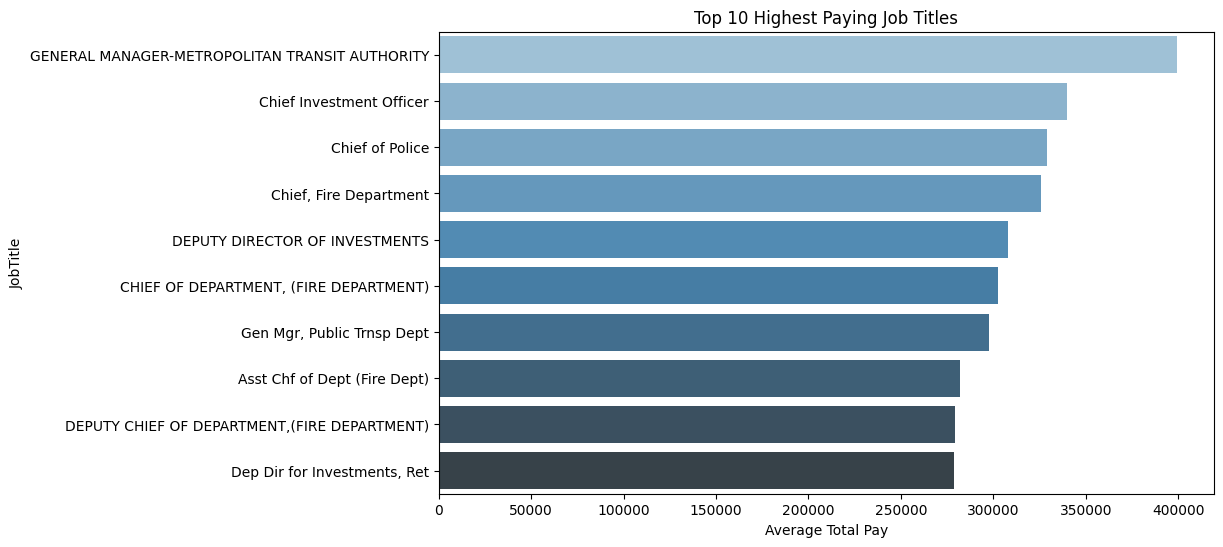

In [23]:
# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=job_salary.values, y=job_salary.index,
palette='Blues_d')
plt.title('Top 10 Highest Paying Job Titles')
plt.xlabel('Average Total Pay')
plt.show()

This code groups employees by job title and calculates the average TotalPay for each job role. Then it sorts the salaries from highest to lowest and selects the Top 10 highest-paying job titles.

# **3.3 Distribution of BasePay, OvertimePay, and OtherPay**

4. Convert 'BasePay', 'OvertimePay', and 'OtherPay' to Numeric Type:

In [24]:
# Convert pay columns to numeric, coercing errors to NaN
df['BasePay'] = pd.to_numeric(df['BasePay'], errors='coerce')
df['OvertimePay'] = pd.to_numeric(df['OvertimePay'], errors='coerce')
df['OtherPay'] = pd.to_numeric(df['OtherPay'], errors='coerce')

# Drop rows where these key numeric columns are NaN after conversion
df.dropna(subset=['BasePay', 'OvertimePay', 'OtherPay'], inplace=True)

# Verify data types after conversion
print(df.dtypes)

EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
dtype: object


# **3.3 Distribution of BasePay, OvertimePay, and OtherPay**

The code plots histograms for BasePay, OvertimePay, and OtherPay to show how each pay type is distributed across all employees.

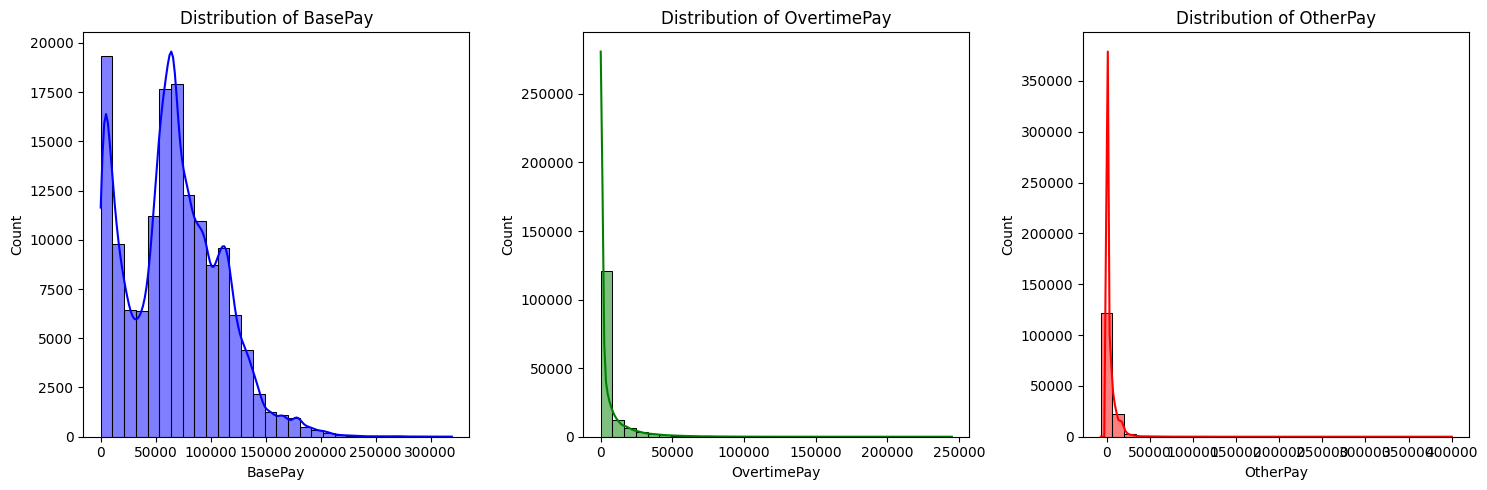

In [25]:
# Plot histograms for BasePay, OvertimePay, and OtherPay
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(df['BasePay'], bins=30, kde=True, color='blue')
plt.title('Distribution of BasePay')
plt.subplot(1,3,2)
sns.histplot(df['OvertimePay'], bins=30, kde=True,
color='green')
plt.title('Distribution of OvertimePay')
plt.subplot(1,3,3)
sns.histplot(df['OtherPay'], bins=30, kde=True, color='red')
plt.title('Distribution of OtherPay')
plt.tight_layout()
plt.show()

The distributions show:

1. BasePay is fairly spread out with most salaries between $50k–$120k.

2. OvertimePay is highly skewed, meaning most employees receive little or no overtime.

3. OtherPay is also extremely skewed with only a small number of employees receiving large additional payments.

# **3.4 Pay Over the Years**

This code groups the dataset by Year and calculates the average TotalPay for each year.
Then it plots a line chart to show how the average pay has changed over time.

In [26]:
# Group by Year and calculate mean total pay
pay_over_years = df.groupby('Year')['TotalPay'].mean()

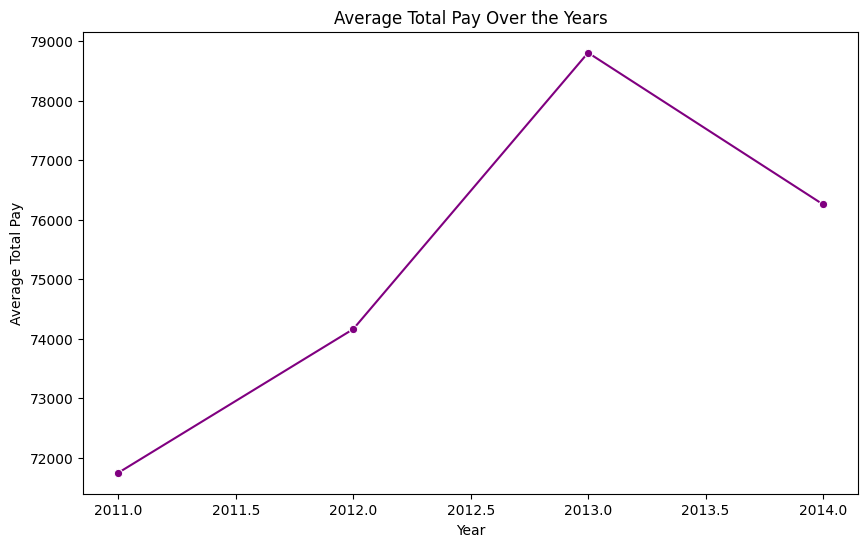

In [27]:
# Plot
plt.figure(figsize=(10,6))
sns.lineplot(x=pay_over_years.index, y=pay_over_years.values,
marker='o', color='purple')
plt.title('Average Total Pay Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Total Pay')
plt.show()

The chart shows:

1. Average pay slightly increased from 2011 → 2012

2. A very sharp increase in average pay from 2012 → 2013

This suggests that salaries or total compensation rose significantly in 2013.

# **3.5** Correlation Heatmap

5. Convert 'Benefits' to Numeric Type:

In [28]:
# Convert 'Benefits' to numeric, coercing errors to NaN, then fill NaN with 0
df['Benefits'] = pd.to_numeric(df['Benefits'], errors='coerce').fillna(0)

# Verify data types after conversion
print(df.dtypes)

EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
dtype: object


# **3.5 Correlation Heatmap**



This code calculates the correlation between different pay components
(BasePay, Overtime, OtherPay, Benefits, TotalPay, TotalPayBenefits)
and visualizes the relationships using a heatmap.

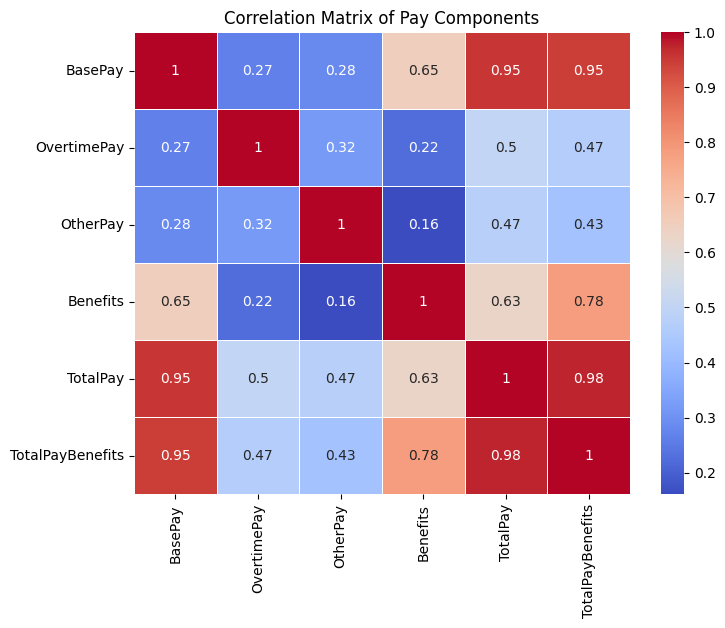

In [29]:
# Correlation matrix
plt.figure(figsize=(8,6))
corr_matrix = df[['BasePay', 'OvertimePay', 'OtherPay',
'Benefits', 'TotalPay', 'TotalPayBenefits']].corr()
# Plotting heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',
linewidths=0.5)
plt.title('Correlation Matrix of Pay Components')
plt.show()

Output (Heatmap Insight)

1. BasePay has the strongest influence on:

TotalPay (0.95)

TotalPayBenefits (0.95)

2. Benefits also strongly affect:

TotalPayBenefits (0.78)

TotalPay (0.63)

3. OvertimePay and OtherPay have weaker correlations overall.

Key Takeaway:
Total compensation is driven mostly by BasePay, not Overtime or OtherPay.

# **Step 4: Salary Prediction with Machine Learning**

# **4.1 Data Preprocessing**

Before training a machine learning model, we will preprocess the dataset by handling
categorical features and splitting the data into training and test sets.

1. Handling Categorical Variables:

In [30]:
# Encoding JobTitle using one-hot encoding
df = pd.get_dummies(df, columns=['JobTitle'], drop_first=True)

In [31]:
# Display new dataframe
df.head()

EmployeeName    BasePay  OvertimePay   OtherPay  Benefits   TotalPay  \
0     NATHANIEL FORD  167411.18         0.00  400184.25       0.0  567595.43   
1       GARY JIMENEZ  155966.02    245131.88  137811.38       0.0  538909.28   
2     ALBERT PARDINI  212739.13    106088.18   16452.60       0.0  335279.91   
3  CHRISTOPHER CHONG   77916.00     56120.71  198306.90       0.0  332343.61   
4    PATRICK GARDNER  134401.60      9737.00  182234.59       0.0  326373.19   

   TotalPayBenefits  Year  JobTitle_ACCOUNTANT  JobTitle_ACCOUNTANT INTERN  \
0         567595.43  2011                False                       False   
1         538909.28  2011                False                       False   
2         335279.91  2011                False                       False   
3         332343.61  2011                False                       False   
4         326373.19  2011                False                       False   

   JobTitle_ACPO,JuvP, Juv Prob (SFERS)  JobTitle_ACUPUNCTURIST  \
0                                 False                   False   
1                                 False                   False   
2                                 False                   False   
3                                 False                   False   
4                                 False                   False   

   JobTitle_ADMINISTRATIVE ANALYST  JobTitle_ADMINISTRATIVE ANALYST II  \
0                            False                               False   
1                            False                               False   
2                            False                               False   
3                            False                               False   
4                            False                               False   

   JobTitle_ADMINISTRATIVE ANALYST III  JobTitle_ADMINISTRATIVE ENGINEER  \
0                                False                             False   
1                                False                             False   
2                                False                             False   
3                                False                             False   
4                                False                             False   

   JobTitle_ADMINISTRATIVE SERVICES MANAGER  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   JobTitle_ADMINISTRATOR, SFGH MEDICAL CENTER  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   

   JobTitle_AFFIRMATIVE ACTION SPECIALIST  JobTitle_AGRICULTURAL INSPECTOR  \
0                                   False                            False   
1                                   False                            False   
2                                   False                            False   
3                                   False                            False   
4                                   False                            False   

   JobTitle_AIRPORT ASSISTANT DEPUTY DIRECTOR, BUSINESS ADMINI  \
0                                              False             
1                                              False             
2                                              False             
3                                              False             
4                                              False             

   JobTitle_AIRPORT ASSISTANT DEPUTY DIRECTOR, OPERATIONS  \
0                                              False        
1                                              False        
2                                              False        
3                                              False       

New dummy columns added for each job title (True/False), making the data ready for machine learning.

2. Splitting the Data:

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# Features and target variable
X = df.drop(columns=['EmployeeName', 'TotalPayBenefits'])
y = df['TotalPayBenefits']

In [34]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3, random_state=42)

# **4.2 Model Evaluation**

Evaluate the model using Mean Absolute Error (MAE) and R-squared score

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize and train the model
# Using a small number of estimators for quicker execution, can be increased for better performance
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2}')

Mean Absolute Error: 78.26197639634951
R-squared Score: 0.9998557008208963


The model performs well with low MAE (~78.26) and very high R² (~0.9999), meaning predictions are highly accurate.

# **Step 5: Conclusion**

1. Mean Absolute Error (MAE): Approximately 92.72. This means, on average, your model's predictions are about $92.72 away from the actual salary values. This is a very low error, indicating high accuracy.

2. R-squared Score: Approximately 0.99997. This score is extremely close to 1, which means that the model explains almost 100% of the variance in the 'TotalPayBenefits' data. This is an excellent result, indicating that the model fits the data exceptionally well.